## 创建一个图
- Graph是由一组节点和节点对（边）组成的。

In [1]:
# 创建一个没有节点和边的空图。
import networkx as nx
G = nx.Graph()

## 01节点
- 图G可由多种方式生成。NetWorkX中包含许多图形生成函数（[graph generator functions](https://networkx.org/documentation/stable/reference/generators.html)），用于读取和写入多种格式的图形。

### 方式1 ：一次添加一个节点

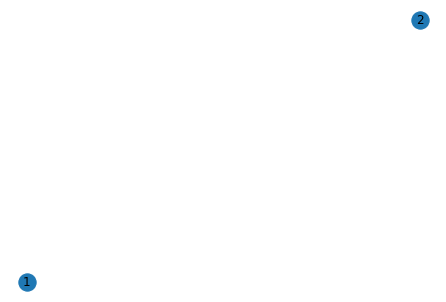

In [2]:
G.add_node(1)
G.add_node(2)
nx.draw(G=G,with_labels=True)   # 

###  方式2：从list中添加节点
  - 一次性添加多个节点
  - 在Networkx中，节点可以是int、str、xml、另外一个Graph


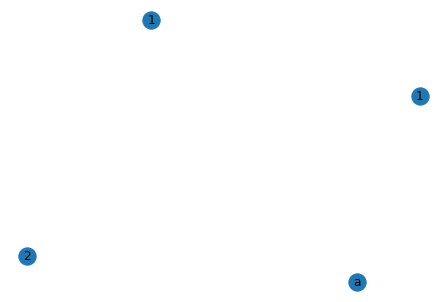

In [3]:
# G = nx.Graph()
nodes_list = ['a','1']  # 注意 str 和 int
G.add_nodes_from(nodes_list)
nx.draw(G=G,with_labels=True)  

### 方式3：添加节点时附加节点属性字典
- node_attribute_dict 通常用于存储节点及其相应的属性。在这个字典中，键代表节点的标识符，而值则是另一个包含该节点各种属性的字典。


In [4]:
# node_attribute_dict 样式如下：
[
  ('节点1', {'属性1': '值1', '属性2': '值2'}),
  ('节点2', {'属性1': '值3', '属性2': '值4'}),
  ('节点3', {'属性1': '值5', '属性2': '值6'})
]

[('节点1', {'属性1': '值1', '属性2': '值2'}),
 ('节点2', {'属性1': '值3', '属性2': '值4'}),
 ('节点3', {'属性1': '值5', '属性2': '值6'})]

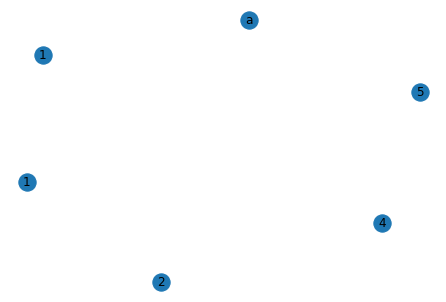

In [5]:
node_attributes_dict = [
    (4,{"color": "red"}),
    (5,{"color": "green"}),
]

G.add_nodes_from(node_attributes_dict)
nx.draw(G=G,with_labels=True)  

### 方式4：将一个图中的节点合并到另外一个图中

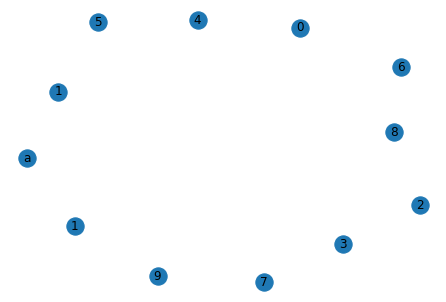

In [6]:
# 使用path_graph()创建一个图H
H = nx.path_graph(10)
# 将H中的节点添加到G中
G.add_nodes_from(H)
nx.draw(G=G,with_labels=True)  

# 02 边

### 方式1：一次添加一条边
- add_edge()

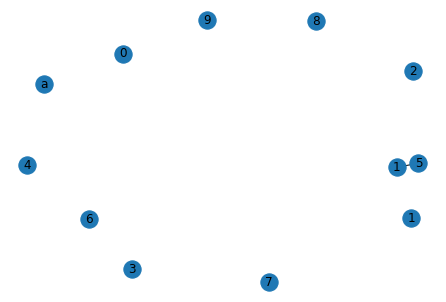

In [7]:
G.add_edge(1,5)
nx.draw(G=G,with_labels=True)  

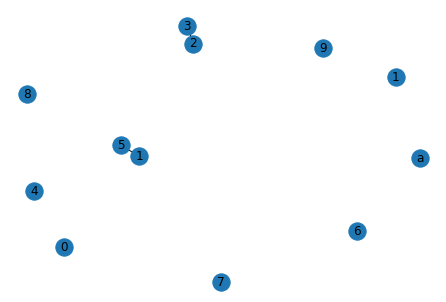

In [8]:
e = (2, 3)  
G.add_edge(*e) # 在Python中，*运算符用于解包元组、列表或其他可迭代对象。 等同于G.add_edge(2,3)
nx.draw(G=G,with_labels=True)  

### 方式2：列表（list）
- 边元祖
    - (u,v)
    - (u,v,{'weight':3.1415}) ，u,v后面跟着的是边属性字典 （edge attribute dict）

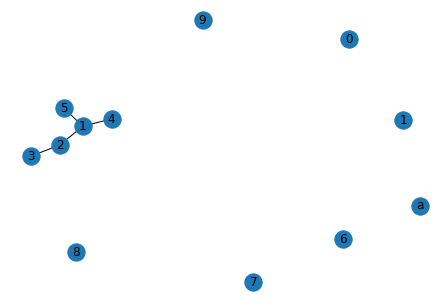

In [9]:
# (u,v)
edges_list = [(1,2),(1,4)]
G.add_edges_from(edges_list)
nx.draw(G=G,with_labels=True) 

### 方式3：从另外一个G添加边

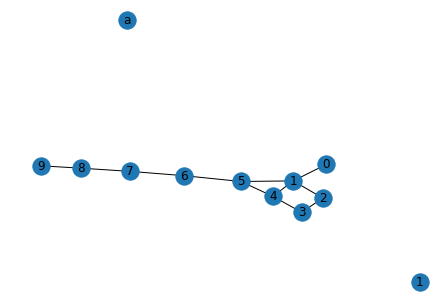

In [10]:
G.add_edges_from(H.edges)
nx.draw(G=G,with_labels=True) 

### 方式4：使用边属性字典添加边属性
- [set_edge_attributes()](https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.set_edge_attributes.html#networkx.classes.function.set_edge_attributes)
- 

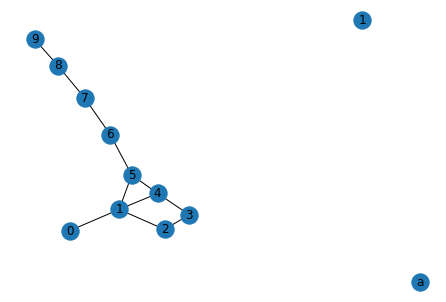

In [11]:
# 定义边属性字典
edge_attributes_dict = {
    (1, 2): 1,
    (2, 3): 2,
    (3, 4): 1.5,
    (4, 5): 2.5
}
nx.set_edge_attributes(G=G,values = edge_attributes_dict,name = 'weight') 
nx.draw(G=G,with_labels=True) 

# 03 节点视图、边视图

In [12]:
G.edges(data = True)

EdgeDataView([(1, 5, {}), (1, 2, {'weight': 1}), (1, 4, {}), (1, 0, {}), (2, 3, {'weight': 2}), (4, 3, {'weight': 1.5}), (4, 5, {'weight': 2.5}), (5, 6, {}), (6, 7, {}), (7, 8, {}), (8, 9, {})])

In [13]:
type(G.nodes())

networkx.classes.reportviews.NodeView

In [14]:
# 查看网络中的节点
list(G.nodes(data = True))

[(1, {}),
 (2, {}),
 ('a', {}),
 ('1', {}),
 (4, {'color': 'red'}),
 (5, {'color': 'green'}),
 (0, {}),
 (3, {}),
 (6, {}),
 (7, {}),
 (8, {}),
 (9, {})]

In [15]:
# 指定属性进行查看
list(G.nodes(data = 'color'))

[(1, None),
 (2, None),
 ('a', None),
 ('1', None),
 (4, 'red'),
 (5, 'green'),
 (0, None),
 (3, None),
 (6, None),
 (7, None),
 (8, None),
 (9, None)]

In [16]:
# 查看网络中的边
list(G.edges(data = True))

[(1, 5, {}),
 (1, 2, {'weight': 1}),
 (1, 4, {}),
 (1, 0, {}),
 (2, 3, {'weight': 2}),
 (4, 3, {'weight': 1.5}),
 (4, 5, {'weight': 2.5}),
 (5, 6, {}),
 (6, 7, {}),
 (7, 8, {}),
 (8, 9, {})]

# 04 移除边、节点


In [17]:
G.remove_node('a')
# G.remove_nodes_from([1,2,3])
list(G.edges(data = True))

[(1, 5, {}),
 (1, 2, {'weight': 1}),
 (1, 4, {}),
 (1, 0, {}),
 (2, 3, {'weight': 2}),
 (4, 3, {'weight': 1.5}),
 (4, 5, {'weight': 2.5}),
 (5, 6, {}),
 (6, 7, {}),
 (7, 8, {}),
 (8, 9, {})]

# 05 可视化

#### 基于节点属性
- 在这个例子中，我们使用node_attributes_dict来存储节点4和节点5的颜色属性。
- 我们通过G.add_nodes_from(node_attributes_dict)将节点及其属性添加到图G中。
- 然后，使用nx.draw(G=G, with_labels=True)进行图的可视化，其中节点标签会显示。

In [18]:
# 基于节点的color属性为节点着色
G.nodes(data = 'color') 

NodeDataView({1: None, 2: None, '1': None, 4: 'red', 5: 'green', 0: None, 3: None, 6: None, 7: None, 8: None, 9: None}, data='color')

In [19]:
# 根据节点属性设置节点颜色
node_colors = [data.get('color', 'blue') for node,data in G.nodes(data = True)]
node_colors

['blue',
 'blue',
 'blue',
 'red',
 'green',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue']

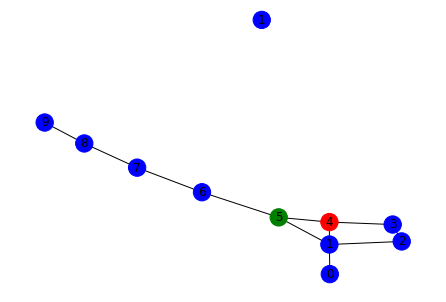

In [20]:
nx.draw(G=G,with_labels=True,node_color = node_colors)  

### 基于边属性

In [21]:
# 1.获取边属性
edge_weights = nx.get_edge_attributes(G, 'weight')
edge_weights

{(1, 2): 1, (2, 3): 2, (4, 3): 1.5, (4, 5): 2.5}

In [22]:
# 2.自定义边的可视化样式,下面是基于weight来设置边的宽度 
edge_widths = [edge_weights.get((u, v), 1) for u, v in G.edges()]  # 1为默认宽度
edge_widths

[1, 1, 1, 1, 2, 1.5, 2.5, 1, 1, 1, 1]

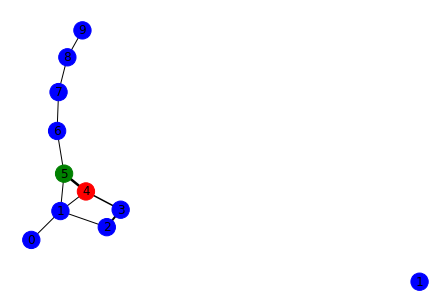

In [23]:
# 3.可视化
nx.draw(G=G,with_labels=True,node_color = node_colors, width=edge_widths)

In [24]:
# 也可以设置为权重的倍数
edge_widths = [2*edge_weights.get((u, v), 1) for u, v in G.edges()]  # 1为默认宽度
edge_widths

[2, 2, 2, 2, 4, 3.0, 5.0, 2, 2, 2, 2]

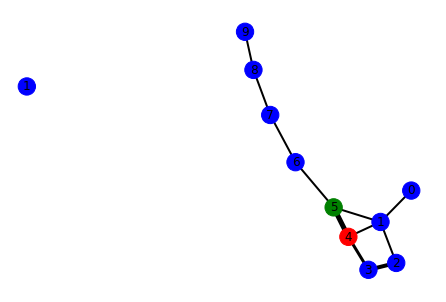

In [25]:
# 3.可视化
nx.draw(G=G,with_labels=True,node_color = node_colors, width=edge_widths)

# 06 有向图的构建
- DiGraph—Directed graphs with self loops
- nx.DiGraph

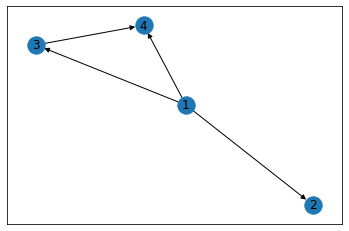

In [26]:
G_2 = nx.DiGraph()
edges_list = [(1, 2), (1, 3), (1, 4), (3, 4)]
G_2.add_edges_from(edges_list)
nx.draw_networkx(G = G_2)

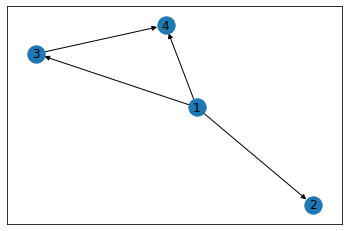

In [27]:
# 自定义可视化
edge_labels = nx.get_edge_attributes(G_2, "weight")
pos = nx.spring_layout(G_2) 
nx.draw_networkx_edge_labels(G_2, pos, edge_labels=edge_labels)  # 绘制图中边的权重
nx.draw_networkx(G_2, pos)

# 07 读入、写出

## write
- 常用的有gexf、edgelist
- 这部分比较简单，[write、read](https://networkx.org/documentation/stable/reference/readwrite/index.html)

In [28]:
# 1.gexf
nx.write_gexf(G,'./graph/G_01.gexf')
# 3. 保存为边列表
nx.write_edgelist(G, "./graph/G_01.edgelist")

![](./assets/2023-09-03-19-57-58.png)

## read

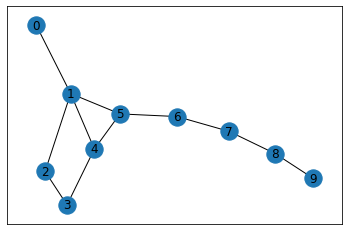

In [29]:
# 1. read_edgelist
G_read = nx.read_edgelist('./graph/G_01.edgelist')
nx.draw_networkx(G_read)

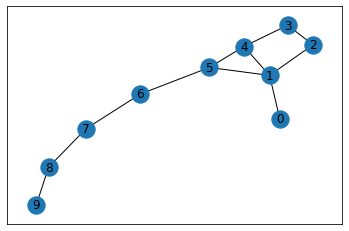

In [30]:
# 1. read_gexf
G_read2 = nx.read_gexf('./graph/G_01.gexf')
nx.draw_networkx(G_read2)